Steps for data analysis:-
1.  **EDA**: The first step in data analysis is to clean and preprocess the data.
2.  **Data Visualization**: After cleaning the data, the next step is to visualize the data. 
    i.e to seperate the Independent and dependent data.
3.  **Spliting**: split the data into train and test data.
4.  **Model Training**: linear regression.
5.  **Polynomial features**: Application
6.  **Model Evaluation**: After training the model, we need to evaluate its performance on the basis of  its prediction.
7.  **Model Selection**: Select the best model based on the evaluation metrics.
8.  **Model Deployment**: Once we have selected the best model, we can deploy it.


In [326]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [109]:
df=pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [110]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [111]:
df.duplicated().sum()

0

In [270]:
df.fillna(df.mean(),inplace=True)       #filling missing values with mean

**Seperation of independent and dependent data**

In [271]:
df.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [272]:
x=df.iloc[:,:-1]        #independent data
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [273]:
y=df["MEDV"]        #dependent data
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

**Spliting into training and test data**

In [274]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [275]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24,666,20.2,319.98,15.70
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8,307,17.4,385.91,2.47
218,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5,276,16.4,396.90,17.92
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94
439,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
128,0.32543,0.0,21.89,0.0,0.624,6.431,98.8,1.8125,4,437,21.2,396.90,15.39
345,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53
448,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13


In [276]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
93,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,4.34879,0.0,18.10,0.0,0.580,6.167,84.0,3.0334,24,666,20.2,396.90,16.29
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4,437,21.2,394.08,14.59
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94


In [277]:
y_train

421    14.2
232    41.7
218    21.5
75     21.4
439    12.8
       ... 
84     23.9
128    18.0
345    17.5
448    14.1
122    20.5
Name: MEDV, Length: 315, dtype: float64

In [278]:
y_test

93     25.0
352    18.6
319    21.0
65     23.5
499    17.5
       ... 
470    19.9
97     38.7
137    17.1
3      33.4
22     15.2
Name: MEDV, Length: 79, dtype: float64

In [279]:
x_train.shape,x_test.shape

((315, 13), (79, 13))

In [280]:
y_train.shape,y_test.shape

((315,), (79,))

---

*MODEL SELECTION from various algorithm*

**Model Training(Linear Regression)**

In [281]:
model=LinearRegression()                #y=mx+c 
model.fit(x_train,y_train)              #y=m1x1+m2x2+m3x3+....+m12x12+c is applied here implicitly

LinearRegression()

In [282]:
y_train_pred=model.predict(x_train)   #seen
y_test_pred=model.predict(x_test)     #unseen

In [283]:
x_train[:3]     #actuall

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24,666,20.2,319.98,15.70
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8,307,17.4,385.91,2.47
218,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5,276,16.4,396.90,17.92


In [284]:
y_train[:3]

421    14.2
232    41.7
218    21.5
Name: MEDV, dtype: float64

In [285]:
y_train_pred[:3]

array([16.81932746, 37.49180585, 24.47922111])

In [286]:
x_test[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
93,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73


In [287]:
y_test[:3]

93     25.0
352    18.6
319    21.0
Name: MEDV, dtype: float64

In [288]:
y_test_pred[:3]

array([29.22850199, 17.5037472 , 21.80803847])

Model Evaluation

In [367]:
def training_eval(actual,predicted):
   mse=mean_squared_error(actual,predicted)
   rmse=np.sqrt(mean_squared_error(actual,predicted))
   mae=mean_absolute_error(actual,predicted)
   r2=r2_score(actual,predicted)

   print(f'MSE:{mse}')
   print(f'RMSE:{rmse}') 
   print(f'MAE:{mae}')
   print(f'R2 Score:{r2}') 

   plt.scatter(actual,predicted,color="r")
   plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],lw=4,ls="--")
   plt.title("Best fit line")
   plt.xlabel("Actual Price")
   plt.ylabel("Predicted Price")
   plt.show()


MSE:1.7223993805326046
RMSE:1.312402141316679
MAE:0.8294311688311706
R2 Score:0.9791150349173106


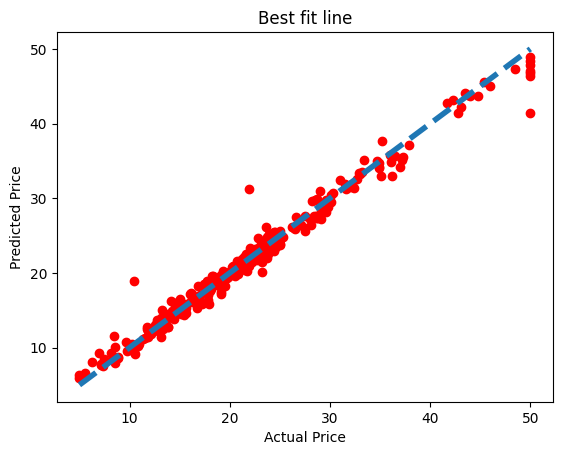

In [368]:
training_eval(y_train,y_train_pred)

MSE:28.623632732084946
RMSE:5.3501058617643205
MAE:2.7626582278481
R2 Score:0.6606420171756726


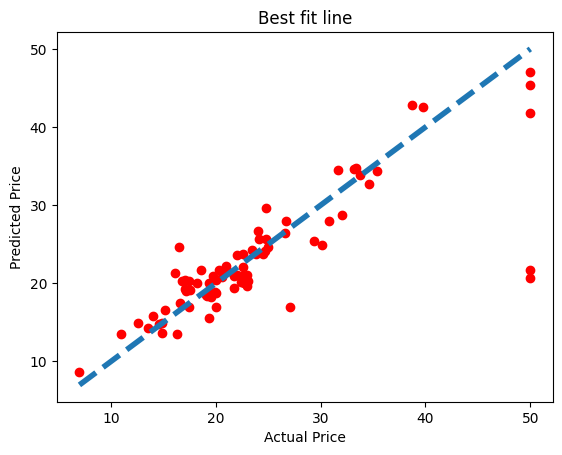

In [369]:
training_eval(y_test,y_test_pred)

----

**Model Training(XGboost regression)**

In [292]:
xgb = XGBRegressor()                     #linear regression using pre-defined polynomial features 
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Model prediction**

In [293]:
y_train_pred_xgb=xgb.predict(x_train)
y_test_pred_xgb=xgb.predict(x_test)

TRAINING DATA PREDICTION

In [294]:
x_train[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24,666,20.2,319.98,15.70
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8,307,17.4,385.91,2.47
218,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5,276,16.4,396.90,17.92


In [295]:
y_train[:3]

421    14.2
232    41.7
218    21.5
Name: MEDV, dtype: float64

In [296]:
y_train_pred_xgb[:3]

array([14.209808, 41.704338, 21.503424], dtype=float32)

TEST DATA PREDICTION

In [297]:
x_test[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
93,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73


In [298]:
y_test[:3]

93     25.0
352    18.6
319    21.0
Name: MEDV, dtype: float64

In [299]:
y_test_pred_xgb[:3]

array([26.854326, 20.745842, 21.876749], dtype=float32)

**Model Evaluation**

In [363]:
def training_eval(actual,predicted):
   mse=mean_squared_error(actual,predicted)
   rmse=np.sqrt(mean_squared_error(actual,predicted))
   mae=mean_absolute_error(actual,predicted)
   r2=r2_score(actual,predicted)

   print(f'MSE:{mse}')
   print(f'RMSE:{rmse}') 
   print(f'MAE:{mae}')
   print(f'R2 Score:{r2}') 

   plt.scatter(actual,predicted,color="r")
   plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],lw=4,ls="--")
   plt.title("Best fit line")
   plt.xlabel("Actual Price")
   plt.ylabel("Predicted Price")
   plt.show()


MSE:5.1016287355239966e-05
RMSE:0.0071425686804706305
MAE:0.00495360147385377
R2 Score:0.9999993814016702


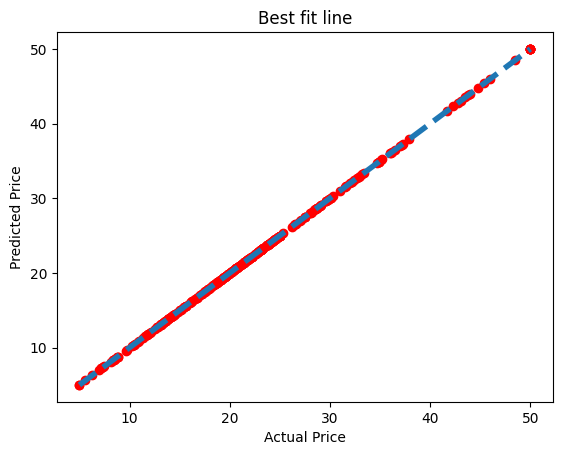

In [365]:
training_eval(y_train,y_train_pred_xgb)

MSE:30.373890609662258
RMSE:5.51125127440786
MAE:3.1098652610295936
R2 Score:0.6398911925575508


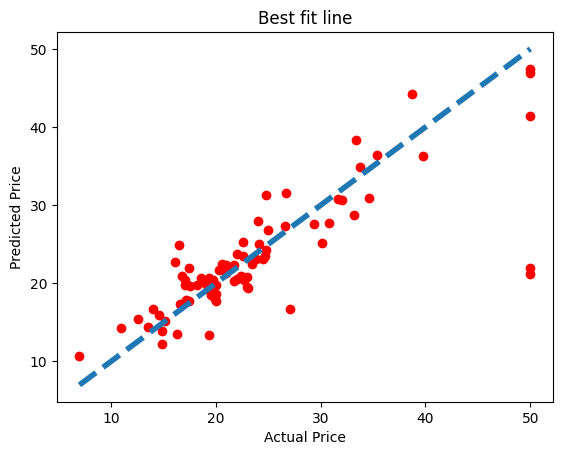

In [366]:
training_eval(y_test,y_test_pred_xgb)

-----

**Model training(random forest)**

In [325]:
random = RandomForestRegressor()
random.fit(x_train, y_train)

RandomForestRegressor()

In [304]:
y_train_pred_random=random.predict(x_train)
y_test_pred_random=random.predict(x_test)

In [305]:
def training_eval(actual,predicted):
   mse=mean_squared_error(actual,predicted)
   rmse=np.sqrt(mean_squared_error(actual,predicted))
   mae=mean_absolute_error(actual,predicted)
   r2=r2_score(actual,predicted)

   print(f'MSE:{mse}')
   print(f'RMSE:{rmse}') 
   print(f'MAE:{mae}')
   print(f'R2 Score:{r2}') 

   plt.scatter(actual,predicted,color="r")
   plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],lw=4,ls="--")
   plt.title("Best fit line Polynomial Regression- training data")
   plt.xlabel("Actual Price")
   plt.ylabel("Predicted Price")
   plt.show()


MSE:1.5845265619047648
RMSE:1.2587797908708118
MAE:0.8118000000000001
R2 Score:0.9807868126916407


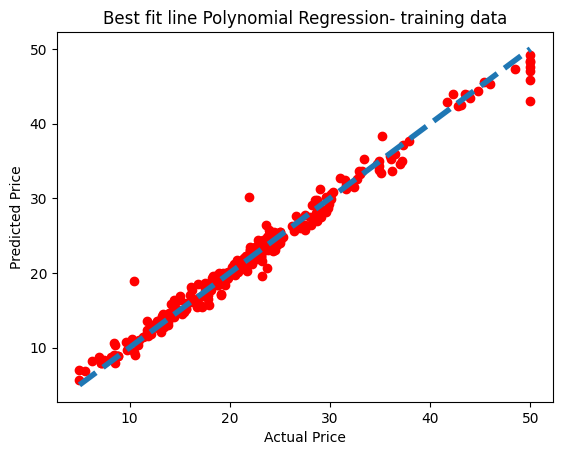

In [306]:
training_eval(y_train,y_train_pred_random)

MSE:27.89470339240507
RMSE:5.281543656205548
MAE:2.732202531645569
R2 Score:0.6692841064817567


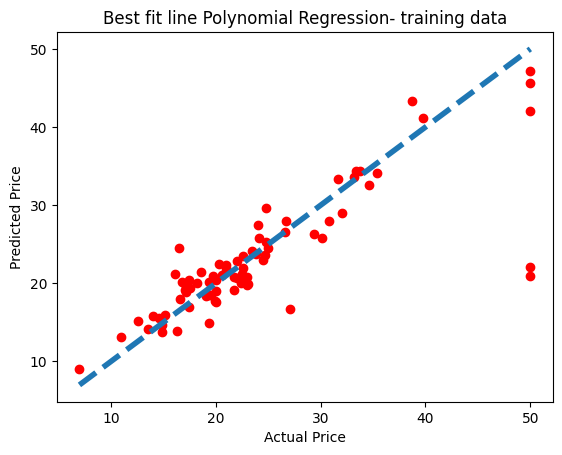

In [307]:
training_eval(y_test,y_test_pred_random)

----

**Random Forest algorithm can be selected for hyperparametertuning based on its previous performance**

**Model Training(gridsearchCV on Random forest model)**

In [354]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Min samples per leaf
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [355]:
best_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, random_state=42)

Train MAE: 0.8294311688311706
Train MSE: 1.7223993805326046
Train RMSE: 1.312402141316679
Train R² Score: 0.9791150349173106


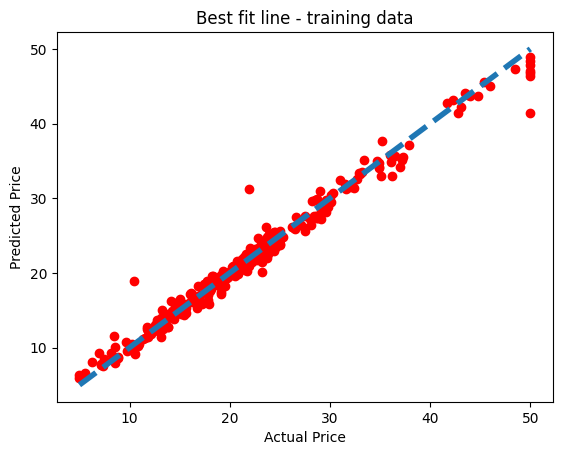

In [362]:
y_train_pred = best_rf.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)
mean_train_mae = mean_absolute_error(y_train, y_train_pred)
mean_train_mse = mean_squared_error(y_train, y_train_pred)
mean_train_rmse = np.sqrt(mean_train_mse)
print("Train MAE:", mean_train_mae)
print("Train MSE:", mean_train_mse)
print("Train RMSE:", mean_train_rmse)
print("Train R² Score:", train_r2)

plt.scatter(y_train, y_train_pred, color='r')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], lw=4, ls='--')
plt.title("Best fit line - training data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

Test MAE: 2.7626582278481
Test MSE: 28.623632732084946
Test RMSE: 5.3501058617643205
Test R² Score: 0.6606420171756726


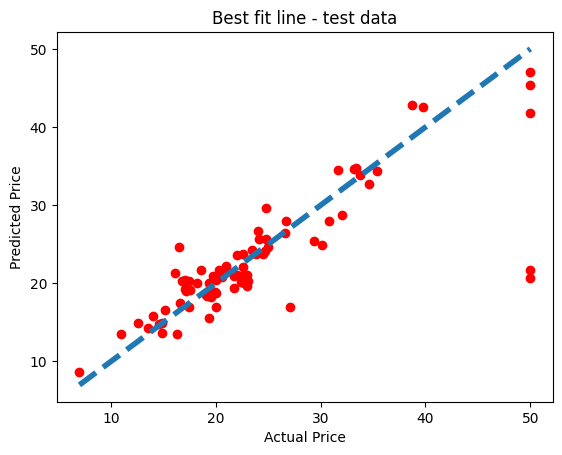

In [361]:
y_test_pred = best_rf.predict(x_test)
test_r2 = r2_score(y_test, y_test_pred)
mean_test_mae = mean_absolute_error(y_test, y_test_pred)
mean_test_mse = mean_squared_error(y_test, y_test_pred)
mean_test_rmse = np.sqrt(mean_test_mse)
print("Test MAE:", mean_test_mae)
print("Test MSE:", mean_test_mse)
print("Test RMSE:", mean_test_rmse)
print("Test R² Score:", test_r2)

plt.scatter(y_test, y_test_pred, color="r")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], lw=4, ls="--")
plt.title("Best fit line - test data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

---

**Report:-**

*Algorithm Used:* Random Forest Regressor (selected as the best model among linear and XGBoost)

*Hyperparameter Tuning:* Used GridSearchCV to find the optimal parameters

*Performance Metrics for test data:*  
Test MAE: 2.7626582278481  
Test MSE: 28.623632732084946  
Test RMSE: 5.3501058617643205  
Test R² Score: 0.6606420171756726  

*Conclusion:*
Random Forest performed best compared to Linear Regression and XGBoost.
Data preprocessing involved filling missing values with the mean.
The model was trained on 80% of the data and tested on 20%.
Where it gave 66% accuracy at last.